In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape, t_u

(torch.Size([11, 1]),
 tensor([[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000],
         [33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000]]))

In [4]:
n_samples = t_c.shape[0]
n_val = int(0.2 * n_samples)

shuffled_idx = torch.randperm(n_samples)

train_idx = shuffled_idx[:-n_val]
val_idx = shuffled_idx[-n_val:]

train_idx, val_idx

(tensor([ 0,  2,  5, 10,  7,  6,  1,  9,  3]), tensor([4, 8]))

In [5]:
t_u_train = t_u[train_idx]
t_c_train = t_c[train_idx]

t_u_val = t_u[val_idx]
t_c_val = t_c[val_idx]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

### Pytorch `nn` module

In [6]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-0.5428],
        [-0.5774]], grad_fn=<AddmmBackward0>)

y = model(x)             ❶ <br>
y = model.forward(x)     ❷ # silent error. Don't do it

In [9]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.0439]], requires_grad=True),
 Parameter containing:
 tensor([-0.7899], requires_grad=True))

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([-0.7460], grad_fn=<ViewBackward0>)

In [13]:
x = torch.ones(10, 1) # The linear model expects dim 0 as batch so it can be any size
linear_model(x)

tensor([[-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460],
        [-0.7460]], grad_fn=<AddmmBackward0>)

In [20]:
linear_model(t_u.squeeze(1)) # by now we should know why this won't work

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x11 and 1x1)

In [22]:
# The data has 11 features (1, 11) instead of 11 observations (11, 1)
# that can be applied to a single neuron (1, 1)
t_u.squeeze(1)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [45]:
linear_model = nn.Linear(1, 1)
optimizer = optim.Adam(linear_model.parameters(), 1e-2)

In [46]:
linear_model.parameters()

<generator object Module.parameters at 0x17e9a0ac0>

In [47]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3598]], requires_grad=True),
 Parameter containing:
 tensor([-0.6981], requires_grad=True)]

In [48]:
def training_loop(n_epochs, optimizer, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = linear_model(t_u_train)
        train_loss = loss_fn(t_p_train, t_c_train)

        t_p_val = linear_model(t_u_val)
        val_loss = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch:{epoch} \t Train Loss:{train_loss} \t Val_loss:{val_loss}')


In [49]:
training_loop(
    5000,
    optimizer,
    nn.MSELoss(),
    t_un_train,
    t_un_val,
    t_c_train,
    t_c_val)

Epoch:1 	 Train Loss:175.8914337158203 	 Val_loss:59.06118392944336
Epoch:2 	 Train Loss:174.37701416015625 	 Val_loss:58.13434600830078
Epoch:3 	 Train Loss:172.87103271484375 	 Val_loss:57.21544647216797
Epoch:500 	 Train Loss:31.533010482788086 	 Val_loss:18.396873474121094
Epoch:1000 	 Train Loss:23.163677215576172 	 Val_loss:16.834449768066406
Epoch:1500 	 Train Loss:15.492572784423828 	 Val_loss:14.842077255249023
Epoch:2000 	 Train Loss:9.653063774108887 	 Val_loss:12.95702075958252
Epoch:2500 	 Train Loss:5.804879188537598 	 Val_loss:11.341679573059082
Epoch:3000 	 Train Loss:3.626518726348877 	 Val_loss:10.067360877990723
Epoch:3500 	 Train Loss:2.60501766204834 	 Val_loss:9.147403717041016
Epoch:4000 	 Train Loss:2.231543779373169 	 Val_loss:8.553796768188477
Epoch:4500 	 Train Loss:2.13360857963562 	 Val_loss:8.224932670593262
Epoch:5000 	 Train Loss:2.117025852203369 	 Val_loss:8.07724380493164


In [50]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[5.3459]], requires_grad=True),
 Parameter containing:
 tensor([-16.6703], requires_grad=True))

In [51]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [52]:
[params.shape for params in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [58]:
[(name, param.shape) for name, param in seq_model.named_parameters()]

[('0.weight', torch.Size([13, 1])),
 ('0.bias', torch.Size([13])),
 ('2.weight', torch.Size([1, 13])),
 ('2.bias', torch.Size([1]))]

In [59]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(1, 8)),
    ('activation', nn.Tanh()),
    ('output', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden): Linear(in_features=1, out_features=8, bias=True)
  (activation): Tanh()
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [60]:
[(name, param.shape) for name, param in seq_model.named_parameters()]

[('hidden.weight', torch.Size([8, 1])),
 ('hidden.bias', torch.Size([8])),
 ('output.weight', torch.Size([1, 8])),
 ('output.bias', torch.Size([1]))]

In [61]:
seq_model.hidden.bias

Parameter containing:
tensor([ 0.2259, -0.4093,  0.2601, -0.4304,  0.0698,  0.2716, -0.9249,  0.6053],
       requires_grad=True)

In [63]:
def training_loop(n_epochs, model, optimizer, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        train_loss = loss_fn(t_p_train, t_c_train)

        t_p_val = linear_model(t_u_val)
        val_loss = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch:{epoch} \t Train Loss:{train_loss} \t Val_loss:{val_loss}')

In [67]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)
 
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden.weight.grad)

Epoch:1 	 Train Loss:203.1359405517578 	 Val_loss:8.077069282531738
Epoch:2 	 Train Loss:199.05799865722656 	 Val_loss:8.077069282531738
Epoch:3 	 Train Loss:195.10597229003906 	 Val_loss:8.077069282531738
Epoch:500 	 Train Loss:10.568843841552734 	 Val_loss:8.077069282531738
Epoch:1000 	 Train Loss:4.855202674865723 	 Val_loss:8.077069282531738
Epoch:1500 	 Train Loss:3.0330991744995117 	 Val_loss:8.077069282531738
Epoch:2000 	 Train Loss:3.4914097785949707 	 Val_loss:8.077069282531738
Epoch:2500 	 Train Loss:2.6670408248901367 	 Val_loss:8.077069282531738
Epoch:3000 	 Train Loss:2.2205262184143066 	 Val_loss:8.077069282531738
Epoch:3500 	 Train Loss:1.9658445119857788 	 Val_loss:8.077069282531738
Epoch:4000 	 Train Loss:1.8186596632003784 	 Val_loss:8.077069282531738
Epoch:4500 	 Train Loss:1.7343695163726807 	 Val_loss:8.077069282531738
Epoch:5000 	 Train Loss:1.687522292137146 	 Val_loss:8.077069282531738
output tensor([[12.9938],
        [ 8.3903]], grad_fn=<AddmmBackward0>)
answe

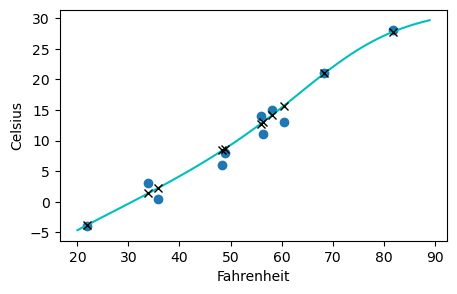

In [74]:
from matplotlib import pyplot as plt
 
t_range = torch.arange(20., 90.).unsqueeze(1)
 
fig = plt.figure(figsize=(5,3))
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')